# HW02: Practice with logistic regression and decision tree

[Please put your name and NetID here.]

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
# ... your code here ... (import statements)

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
iris_df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/iris.csv")
df2 = iris_df[iris_df.Species != 'setosa'][['Petal.Length', 'Species']]
df2

,Petal.Length,Species
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


In [4]:
x = df2['Petal.Length'].to_numpy()
X = x.copy().reshape(-1,1)
y = (df2['Species'] == 'virginica').to_numpy().astype(int)
model = linear_model.LogisticRegression(C=1000)
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'Iris Logistic Regression model: intercept={b}, slope={w}, training score={model.score(X, y)}')
model.predict_proba([[5]])

Iris Logistic Regression model: intercept=[-43.55550129], slope=[8.95564464], training score=0.93


array([[0.2274578, 0.7725422]])

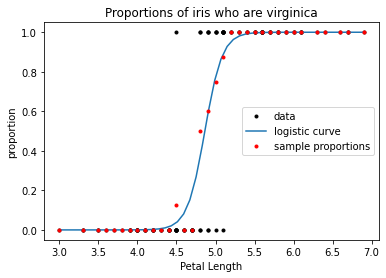

In [5]:
# plot data points
plt.plot(X, y, '.', color='black', label='data')
plt.title('Proportions of iris who are virginica')
plt.xlabel('Petal Length')
plt.ylabel('proportion')

# plot curve
low = min(X)
high = max(X)
xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label='logistic curve')

# find and plot sample proportions
x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]

probs = model.predict_proba(X)[:, 0] # column 0 is P(y_i = 1); column 1 is P(y_i = 0)
plt.plot(x_values, success_proportion_per_x_value, '.', color='red',
         label='sample proportions')

plt.legend(loc='center right')
plt.show(block=False)

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{1 - \frac{1}{1 + e^{-(\mathbf{w x} + b)}}} \\
    & = \ln \frac{\frac{1}{1 + e^{-(\mathbf{w x} + b)}}}{\frac{e^{-(\mathbf{w x} + b)}}{1 + e^{-(\mathbf{w x} + b)}}} \\\\
    & = \ln \frac{1}{e^{-(\mathbf{w x} + b)}}\\
    & = \ln{e^{\mathbf({w x} + b)}} \\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

My answer: 

1: D, 2: C, 3: A, 4: B

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

In [6]:
df2 = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv")
df2
titanic_df = df2[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_df[:7]

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN
6,0,1,male,54.0


In [7]:
print(f'shape before dropping rows with NaN: {titanic_df.shape}' )
titanic_df = titanic_df.dropna()
print(f'shape after dropping rows with NaN: {titanic_df.shape}' )

shape before dropping rows with NaN: (891, 4)
shape after dropping rows with NaN: (714, 4)


In [8]:
titanic_df['Female'] = titanic_df.Sex == 'female'
titanic_df

,Survived,Pclass,Sex,Age,Female
0,0,3,male,22.0,False
1,1,1,female,38.0,True
2,1,3,female,26.0,True
3,1,1,female,35.0,True
4,0,3,male,35.0,False
...,...,...,...,...,...
885,0,3,female,39.0,True
886,0,2,male,27.0,False
887,1,1,female,19.0,True
889,1,1,male,26.0,False


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()

# Model 1
feature_names = ['Pclass', 'Age','Female']
X = titanic_df[feature_names].to_numpy() 
y = titanic_df['Survived'].to_numpy() 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
print(f'Accuracy on training data is clf.score(X, y)={clf.score(X, y)}.')

Accuracy on training data is clf.score(X, y)=0.896358543417367.


|--- Female <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- class: 0
|   |--- Pclass >  1.50
|   |   |--- class: 0
|--- Female >  0.50
|   |--- Pclass <= 2.50
|   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- class: 0

Accuracy on training data is clf2.score(X, y)=0.7913165266106442.


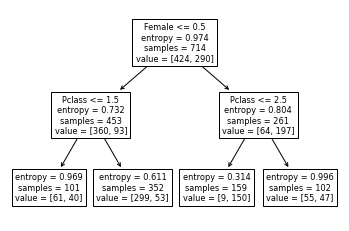

In [10]:
# Model 2
feature_names = ['Pclass', 'Age','Female']
X = titanic_df[feature_names].to_numpy() 
y = titanic_df['Survived'].to_numpy() 
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf2.fit(X, y)
tree.plot_tree(clf2, feature_names=feature_names)
print(export_text(clf2, feature_names=feature_names))
print(f'Accuracy on training data is clf2.score(X, y)={clf2.score(X, y)}.')

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

Female & Pclass

 ## 2c. What proportion of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [11]:
females = titanic_df[titanic_df['Female']== True]
males = titanic_df[titanic_df['Female']== False]
female_survived = float(females[['Survived']].mean())
male_survived = float(males[['Survived']].mean())
print(f'The proportion of females survived is {round(female_survived,3)}')
print(f'The proportion of males survived is {round(male_survived,3)}')

The proportion of females survived is 0.755
The proportion of males survived is 0.205


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

1

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

((2,6),0)